In [10]:
using Revise

In [11]:
using
    QuantumStates,
    OpticalBlochEquations,
    DifferentialEquations

### Load $\tilde{X}(01^10)$ Hamiltonian

In [12]:
H0 = load_from_file("CaOH_BendingMode_Hamiltonian", "X://My Drive//github//QuantumStates//Hamiltonians//")
;

In [13]:
import QuantumStates: polarizability, Stark, Zeeman

# Add polarizability terms
w = 25e-6; P = 13.25; I_trap = 2P / (π * w^2);
const α = [3.37471e-39, 0, -1.01809e-39] # 1064 nm
const θ_trap = 0 * (π / 2)
const ϵ_trap = cos(θ_trap) * [0.0, 1.0, 0.0] + sin(θ_trap) * [1.0, 0.0, -1.0] / √2
polarizability(state, state′) = polarizability(state, state′, α, ϵ_trap)
H = add_to_H(H0, :I_trap, (1e-6 / QuantumStates.h) * polarizability)
H.parameters.I_trap = (1.0 / 3.5) * I_trap / (2ε0 * QuantumStates.c)

# Add Stark terms
H = add_to_H(H, :E, 1e2 * μX * Stark) # 1e2 converts from V/m to V/cm
H.parameters.E = 0.0

# Add Zeeman terms
Zeeman_x(state, state′) = (1/√2)  * (Zeeman(state, state′, -1) - Zeeman(state, state′, +1))
Zeeman_y(state, state′) = (im/√2) * (Zeeman(state, state′, -1) + Zeeman(state, state′, +1))
Zeeman_z(state, state′) = Zeeman(state, state′, 0)
H = add_to_H(H, :B_x, gS * μB * Zeeman_x)
H = add_to_H(H, :B_y, gS * μB * Zeeman_y)
H = add_to_H(H, :B_z, gS * μB * Zeeman_z)
H.parameters.B_x = 0.0
H.parameters.B_y = 0.0
H.parameters.B_z = 0.0

TDM_magnetic_x(state, state′) = (1/√2)  * (TDM_magnetic(state, state′, -1) - TDM_magnetic(state, state′, +1))
TDM_magnetic_y(state, state′) = (im/√2) * (TDM_magnetic(state, state′, -1) + TDM_magnetic(state, state′, +1))
TDM_magnetic_z(state, state′) = TDM_magnetic(state, state′, 0)

@time full_evaluate!(H)
@time QuantumStates.solve!(H)
;

  1.823107 seconds (3.62 M allocations: 191.015 MiB, 2.33% gc time, 95.68% compilation time)


  2.012399 seconds (4.47 M allocations: 563.599 MiB, 7.22% gc time, 97.94% compilation time)


### Simulate $\pi$ pulse on "upleg" transition

In [14]:
using LinearAlgebra

In [15]:
H.parameters.E   = 250 * 0.3
H.parameters.B_x = 100e-3
H.parameters.B_y = 100e-3
H.parameters.B_z =   1e-6
evaluate!(H); QuantumStates.solve!(H);

Start in $|N = 1, F = 0, m = 0⟩$, end in $|N = 2, F = 2, 0⟩$.

In [16]:
N1_idxs, N1_states = subspace(H.states, (N=1,));

In [17]:
N1_states[4]

State{HundsCaseB_Rot}(9945.044204569274, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 0, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, -1, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, 1, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, -1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, 1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 2, -2, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 2, -

In [18]:
N2_idxs, N2_states = subspace(H.states, (N=2,));

In [19]:
N2_states[21]

State{HundsCaseB_Rot}(50000.6665923833, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 0, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, -1, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 1/2, 1, 1, (N = 1:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, -1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, 0, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 1, 1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 2, -2, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, -1, 1, 3/2, 2, -1

In [20]:
TDM(N1_states[4], N2_states[21], 0)

-0.10394515377391363 + 4.37194362928695e-14im

In [21]:
N1_F0to1_states = N1_states[1:4]
N2_F2_states = N2_states[21:24]
states = [N1_F0to1_states; N2_F2_states]
states_idxs = [N1_idxs[1:4]; N2_idxs[21:24]]
H₀ = convert.(ComplexF64, diagm(2π .* energy.(states))) .* 0.0
;

In [22]:
using DataFrames
states_df = states_table(states, dominant_state_only=true)
select(states_df, Not([:c, :S, :I, :Λ]));

In [29]:
transitions_p0 = compute_transitions(states, 0)
transitions_pm = compute_transitions(states, -1)
transitions_pp = compute_transitions(states, +1)
transitions = [transitions_p0; transitions_pm; transitions_pp]
transitions_df = transitions_table(transitions)
transitions_df = select(transitions_df, Not([:c, :S, :I, :J, :Λ, :State, :E, :c_1, :S_1, :I_1, :J_1, :Λ_1, :State_1, :E_1]))
# transitions_df = filter(:f => x -> 40075 < x < 40085, transitions_df)

,N,F,M,N_1,F_1,M_1,f,tdm
,Rational…,Rational…,Rational…,Rational…,Rational…,Rational…,Float64,Float64
1,1//1,1//1,-1//1,1//1,0//1,0//1,1.49534,-0.000554367
2,1//1,1//1,-1//1,1//1,0//1,0//1,1.49534,-0.0029333
3,1//1,1//1,-1//1,1//1,0//1,0//1,1.49534,1.46004e-11
4,1//1,1//1,1//1,1//1,0//1,0//1,1.49704,1.54297e-11
5,1//1,1//1,1//1,1//1,0//1,0//1,1.49704,-0.00303192
6,1//1,0//1,0//1,2//1,2//1,0//1,40055.6,-0.103945
7,1//1,0//1,0//1,2//1,2//1,0//1,40055.6,-0.0175626
8,1//1,0//1,0//1,2//1,2//1,0//1,40055.6,-0.0175625
9,1//1,0//1,0//1,2//1,2//1,1//1,40055.8,-0.0518525


In [37]:
d = zeros(ComplexF64, length(states), length(states), 3)
for (i, state) in enumerate(states)
    for (j, state′) in enumerate(states)
        for p in -1:1
            d[i,j,p+2] = TDM(state, state′, p)
            d[j,i,p+2] = conj(d[i,j,p+2])
        end
    end
end
d[1:4,1:4,:] .= 0.0
d[5:8,5:8,:] .= 0.0

# B_sph = cart2sph * [H.parameters.B_x, H.parameters.B_y, H.parameters.B_z]
d_m = zeros(ComplexF64, length(states), length(states), 3)
# for (i, state) in enumerate(states)
#     for (j, state′) in enumerate(states)
#         for p in -1:1
#             d_m[i,j,p+2] = B_sph[p+2] * gS * μB * TDM_magnetic(state, state′, p)
#             d_m[j,i,p+2] = conj(d_m[i,j,p+2])
#         end
#     end
# end
# d_m[5:8,1:4,:] .= 0.0
# d_m[1:4,5:8,:] .= 0.0
;

In [31]:
k = [1.0, 0.0, 0.0]
# θ_field = 0.064 * (π / 2) # what we think we have
θ_field = 0.0 * (π / 2)
ϵ_field = cos(θ_field) * [0.0, 1.0, 0.0] + sin(θ_field) * [1.0, 0.0, -1.0] / √2
ω = 2π * (energy(states[5]) - energy(states[4])) # |F=0, m=0⟩ -> |F = 2, m = 0⟩
# ω = 2π * (energy(states[7]) - energy(states[4])) # |F=0, m=0⟩ -> |F = 2, m = ±1⟩
# ω = 2π * (energy(states[7]) - energy(states[3])) # |F=1, m=0⟩ -> |F = 2, m = ±1⟩
s = 17.0
field = Laser(k, ϵ_field, ω, s)
magnetic_field(r) = (1.0, 1.0, 1.0)
;

In [32]:
ψ0 = zeros(ComplexF64, length(states))
ψ0[4] = 1.0 # everything in |F=0, m=0⟩

particle = Particle()
(dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false) 
@time ψ!(dψ, ψ0, p, 0.0)
;

LoadError: MethodError: no method matching schrödinger(::Particle, ::Vector{State{HundsCaseB_Rot}}, ::Matrix{ComplexF64}, ::Vector{Laser}, ::typeof(magnetic_field), ::Array{ComplexF64, 3}, ::Array{ComplexF64, 3}, ::Vector{ComplexF64}, ::Bool)
[0mClosest candidates are:
[0m  schrödinger(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any; λ, freq_res) at X:\My Drive\github\OpticalBlochEquations\src\OpticalBlochEquations.jl:132

In [33]:
t_end = 9.0
tspan = (0., t_end)
times = range(tspan[1], tspan[2], 1000)

prob = ODEProblem(ψ!, ψ0, tspan, p)
@time sol = DifferentialEquations.solve(prob, alg=DP5(), saveat=times) #, abstol=1e-6, reltol=1e-7) #, dense=false, saveat=times)
;

LoadError: UndefVarError: p not defined

In [34]:
using Plots
plot_us = sol.u
plot_ts = sol.t

plot(plot_ts, [real(conj(u[1]) * u[1]) for u in plot_us], size=(800, 400), ylim=(-0.1, 1.1), legend=nothing)
for i in 2:size(sol.u[1], 1)
    plot!(plot_ts, [real(conj(u[i]) * u[i]) for u in plot_us])
end
plot!()

LoadError: UndefVarError: sol not defined

### Simulate $\pi$ pulse on "downleg" transition

In [54]:
# Define the TDM for x polarization
TDM_x(state, state′) = (TDM(state, state′, -1) - TDM(state, state′, +1)) / √2

TDM_x (generic function with 1 method)

In [55]:
using LinearAlgebra

Start in $|N = 2, F = 2, m = 0⟩$, end in $|N = 1, F = 1, m = \pm 1, p = +⟩$.

In [124]:
H.parameters.E   = 230 * 0.3
H.parameters.B_x =   0e-3
H.parameters.B_y =   0e-3
H.parameters.B_z = 200e-3
H.parameters.I_trap = (1.0 / 3.5) * I_trap / (2ε0 * QuantumStates.c)
;

In [125]:
evaluate!(H)
QuantumStates.solve!(H)

N2_idxs, N2_states = subspace(H.states, (N=2,));
N1_idxs, N1_states = subspace(H.states, (N=1,));
N2_states_close = N2_states[21:23]
N1_states_close = N1_states[13:16]
states = [N2_states_close; N1_states_close]
states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]    
states = H.states[states_idxs]

# update_basis_tdms!(H)
# update_tdms!(H, states_idxs)
# d = H.tdms[states_idxs, states_idxs, :]
;

In [106]:
# transitions_p0 = compute_transitions(states, 0)
transitions_pm = compute_transitions(states, -1)
transitions_pp = compute_transitions(states, +1)
transitions = [transitions_p0; transitions_pm; transitions_pp]
transitions_df = transitions_table(transitions)
transitions_df = select(transitions_df, Not([:c, :S, :I, :J, :Λ, :State, :E, :c_1, :S_1, :I_1, :J_1, :Λ_1, :State_1, :E_1]))
transitions_df.f .+= -19995 * 2 .+ 0.760
transitions_df = filter(:F_1 => F -> F == 2, transitions_df)
transitions_df = filter(:M_1 => M -> M == 0, transitions_df)
transitions_df = filter(:M   => M -> M ∈ [-1,1], transitions_df)
# transitions_df = filter(:f => x -> 40075 < x < 40085, transitions_df)
transitions_df

,N,F,M,N_1,F_1,M_1,f,tdm
,Rational…,Rational…,Rational…,Rational…,Rational…,Rational…,Float64,Float64
1,1//1,1//1,1//1,2//1,2//1,0//1,6.01173,0.208915
2,1//1,1//1,-1//1,2//1,2//1,0//1,6.04187,0.222907


In [103]:
s = 160.0
t_π_pulse = 1.8
tspan_π_pulse = (0.0, t_π_pulse) 
k = [1.0, 0.0, 0.0]
θ_field = 1.0 * (π / 2)
ϵ_field = cos(θ_field) * [0.0, 1.0, 0.0] + sin(θ_field) * [1.0, 0.0, -1.0] / √2
ω = 2π * ((energy(states[5]) + energy(states[6])) / 2 - energy(states[1]))
# ω = 2π * (energy(states[5]) - energy(states[1]))
field = Laser(k, ϵ_field, ω, s)
field0 = Laser(k, ϵ_field, ω, 0.0)
;

In [44]:
states[5] |> energy

10003.449652925668

In [45]:
states[6] |> energy

10003.458473300712

In [475]:
# Solve for the population after the downleg
ψ0 = zeros(ComplexF64, 7); ψ0[1] = 1.0
(dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false)  
prob_afterdownleg = ODEProblem(ψ!, ψ0, tspan_π_pulse, p)
sol_afterdownleg = DifferentialEquations.solve(prob_afterdownleg, alg=DP5())
ψ0_afterdownleg = sol_afterdownleg[end]
;

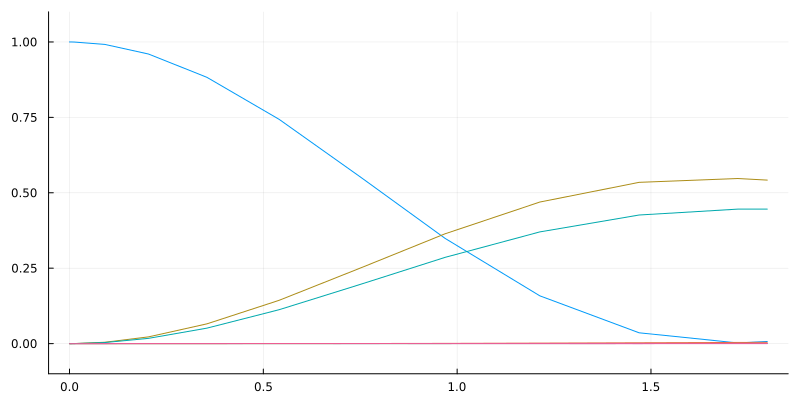

In [476]:
plot_us = sol_afterdownleg.u
plot_ts = sol_afterdownleg.t

plot(size=(800, 400), ylim=(-0.1, 1.1), legend=nothing)
for i in 1:size(ψ0_afterdownleg, 1)
    plot!(plot_ts, [real(conj(u[i]) * u[i]) for u in plot_us])
end
plot!()

### Precess in EDM state, then read out

Plot the detected population across precession times and a $\pi$-pulse.

In [429]:
U(ψ, ω, t) = [ψ[i] * exp(-ω[i] * im * t) for i ∈ eachindex(ψ)];

In [430]:
time_π_pulse = 1.8
tspan_π_pulse = (0., time_π_pulse)

precess_times = 0:0.1:100
pop_detected = zeros(length(precess_times))

prev_precess_time = 0.0
prev_sol_precess_ψ = ψ0_afterdownleg

@time for (i, precess_time) ∈ enumerate(precess_times)

    ψ_afterprecess = U(prev_sol_precess_ψ, 2π .* energy.(states), precess_time - prev_precess_time)
    
    (_, _, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ_afterprecess, false)
    prob_π_pulse = ODEProblem(ψ!, ψ_afterprecess, tspan_π_pulse, p)
    sol_π_pulse = DifferentialEquations.solve(prob_π_pulse, alg=DP5())
    ψ_π_pulse = sol_π_pulse.u[end]

    ψ_detectable = ψ_π_pulse[1:3]
    pop_detected[i] = sum(conj.(ψ_detectable) .* ψ_detectable)

    prev_precess_time = precess_time
    prev_sol_precess_ψ = ψ_afterprecess      

end

  0.209937 seconds (356.87 k allocations: 41.075 MiB, 27.21% compilation time)


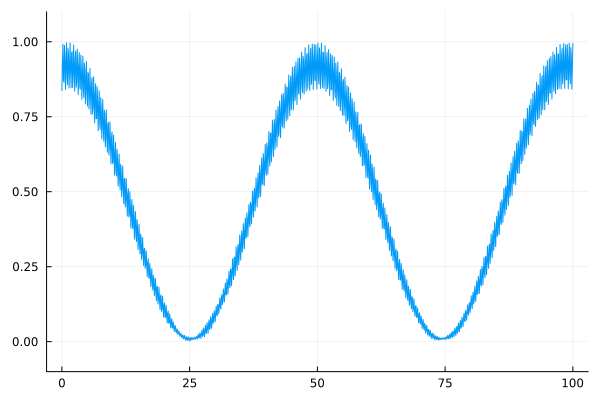

In [431]:
plot(precess_times, pop_detected, legend=nothing, ylim=(-0.1,1.1))

### Scan transverse fields

In [39]:
using ProgressMeter

In [596]:
H.parameters.E   = 200 * 0.3
H.parameters.B_x =  20e-3
H.parameters.B_z =  50e-3
H.parameters.I_trap = (1.0 / 3.5) * I_trap / (2ε0 * QuantumStates.c)
;

In [597]:
time_π_pulse = 1.6
tspan_π_pulse = (0., time_π_pulse)

Bys = (0:10:50) .* 1e-3
precess_times = 0:2:300
pop_detected = zeros(length(Bys), length(precess_times))

θ_field = 1.0 * (π / 2)
ϵ_field = cos(θ_field) * [0.0, 1.0, 0.0] + sin(θ_field) * [1.0, 0.0, -1.0] / √2
field = Laser(k, ϵ_field, ω, s)
field0 = Laser(k, ϵ_field, ω, 0.0)

@time @showprogress for (i, By) ∈ enumerate(Bys)

    # Re-solve the Hamiltonian for every new parameter value
    H.parameters.B_y = By
    evaluate!(H)
    QuantumStates.solve!(H)

    N2_idxs, N2_states = subspace(H.states, (N=2,));
    N1_idxs, N1_states = subspace(H.states, (N=1,));
    N2_states_close = N2_states[21:23]
    N1_states_close = N1_states[13:16]
    states = [N2_states_close; N1_states_close]
    states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]    
    states = H.states[states_idxs]

    update_basis_tdms!(H)
    update_tdms!(H, states_idxs)
    d = H.tdms[states_idxs, states_idxs, :]
    
    # Solve for the population after the downleg
    (dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false)  
    prob_afterdownleg = ODEProblem(ψ!, ψ0, tspan_π_pulse, p)
    sol_afterdownleg = DifferentialEquations.solve(prob_afterdownleg, alg=DP5())
    ψ0_afterdownleg = sol_afterdownleg[end]
    
    prev_precess_time = 0.0
    prev_sol_precess_ψ = ψ0_afterdownleg
    for (j, precess_time) ∈ enumerate(precess_times)

        U = exp.(-2π .* im .* energy.(states) .* (precess_time - prev_precess_time))
        ψ_afterprecess = U .* prev_sol_precess_ψ

        (dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ_afterprecess, false)
        prob_π_pulse = ODEProblem(ψ!, ψ_afterprecess, tspan_π_pulse, p)
        sol_π_pulse = DifferentialEquations.solve(prob_π_pulse, alg=DP5())
        ψ_π_pulse = sol_π_pulse.u[end]

        ψ_detectable = ψ_π_pulse[1:3]
        pop_detected[i,j] = sum(conj.(ψ_detectable) .* ψ_detectable)
        
        prev_precess_time = precess_time
        prev_sol_precess_ψ = ψ_afterprecess      
        
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


  1.068115 seconds (687.95 k allocations: 127.688 MiB)


In [598]:
# plot(precess_times, pop_detected', ylim=(-0.1,1.1), size=(1000,400), labels=Bys', linewidth=2.5)
# plot!(legend=:outertopright)

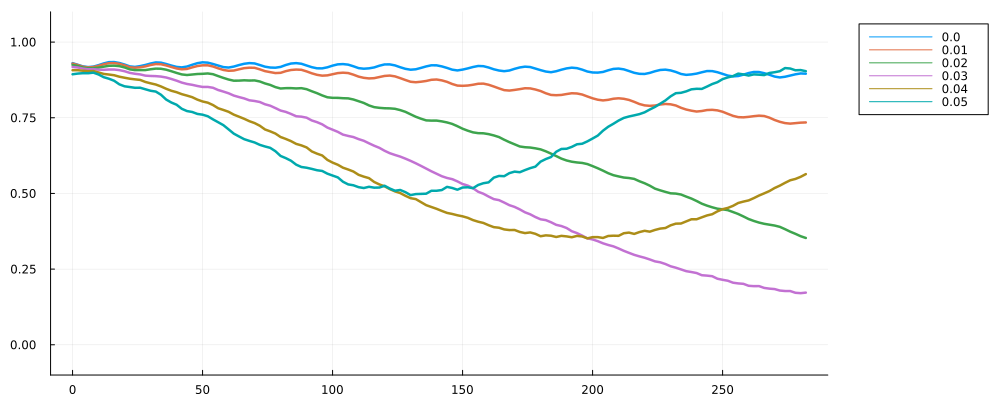

In [599]:
# Smoothed plot
using RollingFunctions
pop_detected_rolling = hcat([rollmean(pop_detected[i,:], 10) for i ∈ axes(pop_detected,1)]...);
plot(precess_times[1:size(pop_detected_rolling,1)], pop_detected_rolling, 
    ylim=(-0.1,1.1), size=(1000,400), labels=Bys', linewidth=2.5)
plot!(legend=:outertopright)

### Scan trap depth

What is the range of trap depth explored by the molecules?

Density is $\propto \exp(-x^2/2\sigma_x^2) \exp(-y^2/2\sigma_y^2) \exp(-z^2/2\sigma_z^2)$, where $\sigma_\alpha = \omega_\alpha^{-1} \sqrt{k_B T/m}$. 

* $\text{T} = 50~\mu\text{K}$
* $\omega_x = \omega_y = 2\pi \times 4~\text{kHz}$
* $\omega_z = 2\pi \times 30~\text{kHz}$



In [8]:
amu = 1.66e-27
kB = 1.38e-23
m = 57 * amu
ωx = 2π * 6774/2
ωy = 2π * 8721/2
ωz = 218.734
temp = 50e-6
const w0x = 0.0000275
const w0y = 0.0000233
const λ = 1064e-9
const zRx = π * w0x^2 / λ
const zRy = π * w0y^2 / λ
σ_x = ωx^(-1) * sqrt(kB * temp / m)
σ_y = ωy^(-1) * sqrt(kB * temp / m)
σ_z = ωz^(-1) * sqrt(kB * temp / m)
;

In [9]:
using Distributions

waist(z,w0,zR,z0) = w0 * sqrt(1 + ((z-z0) / zR)^2)
const T_depth = (1.0 / 3.5) * 645e-6
function ODT_Potential(r)
    x, y, z = r
    wx = waist(z, w0x, zRx, 0)
    wy = waist(z, w0y, zRy, 0)    
    return T_depth - T_depth * (1 - ((w0x * w0y) / (wx * wy)) * exp(-2 * (x^2 / wx^2 + y^2 / wy^2)))
end
r = (Normal(0, σ_x), Normal(0, σ_y), Normal(0, σ_z))

n = 100_000
rs = Vector{Float64}[]
for i ∈ 1:n
    push!(rs, [rand(r_i) for r_i ∈ r])
end

depths = ODT_Potential.(rs)

mean(depths) .* 1e6 |> display
std(depths) .* 1e6 |> display

164.49655327003558

14.283426014894209

In [10]:
using StatsBase, LsqFit

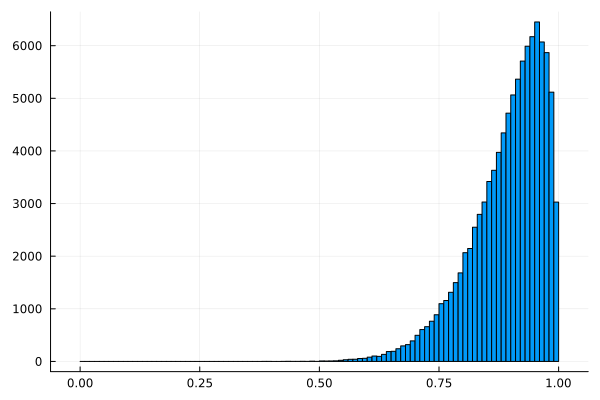

In [11]:
h = fit(Histogram, depths ./ T_depth, 0:0.01:1.0) 
plot(h, legend=nothing)

In [12]:
using ProgressMeter

In [27]:
H.parameters.E   = 203 * 0.3
H.parameters.B_x =   0e-3
H.parameters.B_y =   0e-3
H.parameters.B_z = 200e-3
evaluate!(H)
QuantumStates.solve!(H)
states = H.states

N2_idxs, N2_states = subspace(H.states, (N=2,));
N1_idxs, N1_states = subspace(H.states, (N=1,));
N2_states_close = N2_states[21:23]
N1_states_close = N1_states[13:16]
states = [N2_states_close; N1_states_close]
states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]
states = H.states[states_idxs]

θ_field = 1.0 * (π / 2)
ϵ_field = cos(θ_field) * [0.0, 1.0, 0.0] + sin(θ_field) * [1.0, 0.0, -1.0] / √2
ω = 2π * ((energy(states[5]) + energy(states[6])) / 2 - energy(states[1]))
field = Laser(k, ϵ_field, ω, s)
field0 = Laser(k, ϵ_field, ω, 0.0)
magnetic_field(r) = (1.0, 1.0, 1.0)

ψ0 = zeros(ComplexF64, 7); ψ0[1] = 1.0;
;

In [28]:
U(ψ, ω, t) = [ψ[i] * exp(-ω[i] * im * t) for i ∈ eachindex(ψ)];
function prob_func(prob, i, repeat)
    remake(prob, u0=U(prob.u0, energy.(prob.p.states), precess_times[i]))
end
detectable(ψ) = real(sum(conj.(ψ[1:3]) .* ψ[1:3]))
output_func(sol, i) = (detectable(sol.u[end]), false)

output_func (generic function with 1 method)

In [111]:
time_π_pulse = 1.65
tspan_π_pulse = (0., time_π_pulse)

precess_times = 0:100:10000

I_trap_scans = collect(h.edges[1][2:end])
I_trap_idxs = 50:10:100

Bzs = (20:20:100) .* 1e-3
τs = zeros(length(Bzs))
τs_noB = zeros(length(Bzs))
τs_σ = zeros(length(Bzs))

@. decaying_cosine(t, p) = p[1] * cos(2π * t / p[2]) * exp(-t / p[3]) + p[4]

progress = Progress(length(Bzs) * 5 * length(I_trap_idxs))

for (j, Bz) ∈ enumerate(Bzs)

    Bzs_σ = [Bz - 1e-3, Bz - 0.5e-3, Bz, Bz + 0.5e-3, Bz + 1e-3]

    pop_detected = zeros(length(I_trap_idxs), length(Bzs_σ), length(precess_times))
    for (i, I_trap_value) ∈ enumerate(I_trap_scans[I_trap_idxs]), (k, Bz_σ) ∈ enumerate(Bzs_σ)

        # Re-solve the Hamiltonian for every new parameter value
        H.parameters.I_trap = (I_trap_value / 3.5) * I_trap / (2ε0 * QuantumStates.c)
        H.parameters.B_z = Bz_σ
        evaluate!(H)
        QuantumStates.solve!(H)

        N2_idxs, N2_states = subspace(H.states, (N=2,));
        N1_idxs, N1_states = subspace(H.states, (N=1,));
        N2_states_close = N2_states[21:23]
        N1_states_close = N1_states[13:16]
        states = [N2_states_close; N1_states_close]
        states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]
        states = H.states[states_idxs]

        update_basis_tdms!(H)
        update_tdms!(H, states_idxs)
        d = H.tdms[states_idxs, states_idxs, :]

        # Solve for the population after the downleg
        (dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false)  
        prob_afterdownleg = ODEProblem(ψ!, ψ0, tspan_π_pulse, p)
        sol_afterdownleg = DifferentialEquations.solve(prob_afterdownleg, alg=DP5(), save_everystep=false)
        ψ0_afterdownleg = sol_afterdownleg[end]

        # EnsembleProblem
        prob_π_pulse = ODEProblem(ψ!, ψ0_afterdownleg, tspan_π_pulse, p)
        ensemble_prob = EnsembleProblem(prob_π_pulse, prob_func=prob_func, output_func=output_func)
        sim = solve(ensemble_prob, DP5(), EnsembleThreads(), trajectories=length(precess_times), save_everystep=false)

        pop_detected[i,k,:] = sim.u
        
        next!(progress)
        
    end
    data_averaged = vec(sum(mean(pop_detected, dims=2)[:,1,:] .* h.weights[I_trap_idxs], dims=1)' ./ sum(h.weights[I_trap_idxs]))
    data_averaged_noB = vec(sum(pop_detected[:,3,:] .* h.weights[I_trap_idxs], dims=1)' ./ sum(h.weights[I_trap_idxs]))
    p0 = [0.4, 1000, 1000, 0.5]
    lb = [0.0, 0.0, 0.0, 0.45]
    ub = [0.5, 2000, 10000, 0.55]
    
    fitted_data = curve_fit(decaying_cosine, precess_times, data_averaged, p0)
    τs[j] = fitted_data.param[3]
    τs_σ[j] = stderror(fitted_data)[3]
    
    fitted_data_noB = curve_fit(decaying_cosine, precess_times, data_averaged_noB, p0)
    τs_noB[j] = fitted_data_noB.param[3]
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:38


LoadError: LAPACKException(2)

In [112]:
τs

5-element Vector{Float64}:
 2992.162396037182
 7005.61877929437
 9794.117446119564
 9208.1649343337
    3.4795169184104635

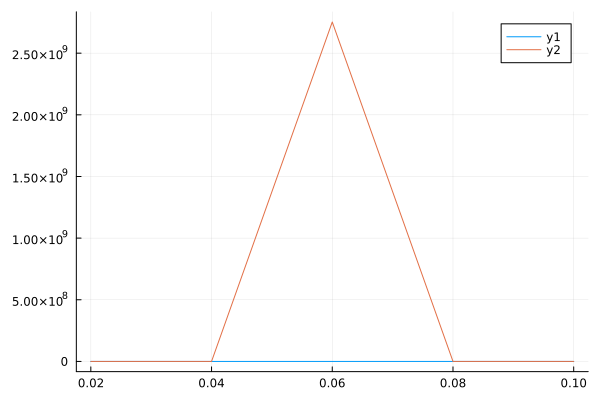

In [113]:
plot(Bzs, τs)
plot!(Bzs, τs_noB)

In [75]:
# plot(precess_times, pop_detected[:,1,:]', ylim=(-0.1,1.1), size=(1000,400), linewidth=2.5)
# plot!(legend=:outertopright)

In [101]:
Bz = 50e-3
precess_times = 0:20:5000
I_trap_idxs = 50:2:100

Bzs_σ = [Bz - 1e-3, Bz - 0.5e-3, Bz, Bz + 0.5e-3, Bz + 1e-3]

progress = Progress(length(Bzs_σ) * length(I_trap_idxs))

pop_detected = zeros(length(I_trap_idxs), length(Bzs_σ), length(precess_times))
for (i, I_trap_value) ∈ enumerate(I_trap_scans[I_trap_idxs]), (k, Bz_σ) ∈ enumerate(Bzs_σ)

    # Re-solve the Hamiltonian for every new parameter value
    H.parameters.I_trap = (I_trap_value / 3.5) * I_trap / (2ε0 * QuantumStates.c)
    H.parameters.B_z = Bz_σ
    evaluate!(H)
    QuantumStates.solve!(H)

    N2_idxs, N2_states = subspace(H.states, (N=2,));
    N1_idxs, N1_states = subspace(H.states, (N=1,));
    N2_states_close = N2_states[21:23]
    N1_states_close = N1_states[13:16]
    states = [N2_states_close; N1_states_close]
    states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]
    states = H.states[states_idxs]

    update_basis_tdms!(H)
    update_tdms!(H, states_idxs)
    d = H.tdms[states_idxs, states_idxs, :]

    # Solve for the population after the downleg
    (dψ, ψ, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false)  
    prob_afterdownleg = ODEProblem(ψ!, ψ0, tspan_π_pulse, p)
    sol_afterdownleg = DifferentialEquations.solve(prob_afterdownleg, alg=DP5(), save_everystep=false)
    ψ0_afterdownleg = sol_afterdownleg[end]

    # EnsembleProblem
    prob_π_pulse = ODEProblem(ψ!, ψ0_afterdownleg, tspan_π_pulse, p)
    ensemble_prob = EnsembleProblem(prob_π_pulse, prob_func=prob_func, output_func=output_func)
    sim = solve(ensemble_prob, DP5(), EnsembleThreads(), trajectories=length(precess_times), save_everystep=false)

    pop_detected[i,k,:] = sim.u

    next!(progress)
    
end
;

Progress: 100%|█████████████████████████████████████████| Time: 0:03:51


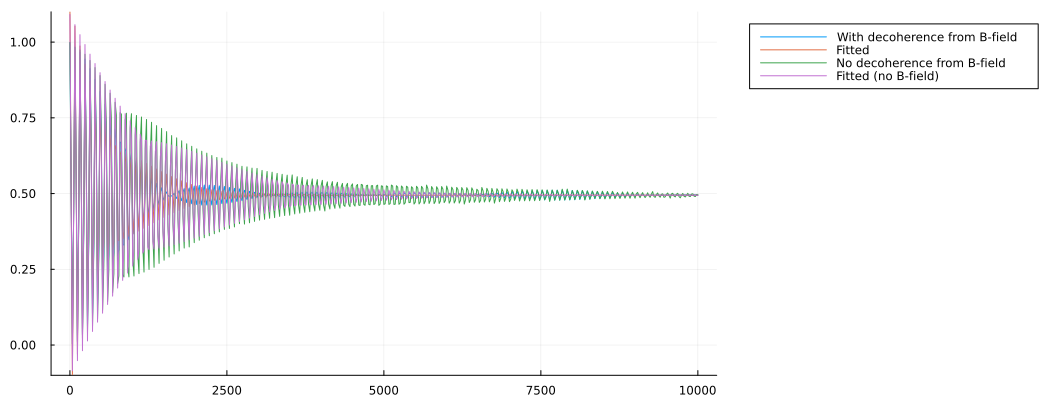

In [105]:
using Statistics
data_averaged = vec(sum(mean(pop_detected, dims=2)[:,1,:] .* h.weights[I_trap_idxs], dims=1)' ./ sum(h.weights[I_trap_idxs]))
data_averaged_noB = vec(sum(pop_detected[:,3,:] .* h.weights[I_trap_idxs], dims=1)' ./ sum(h.weights[I_trap_idxs]))
p0 = [0.4, 1000, 1000, 0.5]
lb = [0.0, 0.0, 0.0, 0.45]
ub = [0.5, 2000, 10000, 0.55]

plot(precess_times, 
    # take mean over B-field, then weighted average over trap depths
    data_averaged,
    label="With decoherence from B-field"
)
fitted_data = curve_fit(decaying_cosine, precess_times, data_averaged, p0)#, lower=lb, upper=ub)
plot!(precess_times, 
    decaying_cosine(precess_times, fitted_data.param),
    label="Fitted"
)
plot!(precess_times,
    # take mean over B-field, then weighted average over trap depths
    data_averaged_noB,
    label="No decoherence from B-field"
)
fitted_data_noB = curve_fit(decaying_cosine, precess_times, data_averaged_noB, p0)#, lower=lb, upper=ub)
plot!(precess_times,
    decaying_cosine(precess_times, fitted_data_noB.param),
    label="Fitted (no B-field)"
)
plot!(
    legend=:outertopright,
    size=(1050,400),
    ylim=(-0.1,1.1)
    )

In [106]:
fitted_data.param[3]

699.394410436792

In [107]:
fitted_data_noB.param[3]

1416.7335164317037

### Grid interpolation

Fix $B_z = 50~\text{mG}$, then scan $E$ and $I_\text{trap}$.

In [13]:
H.parameters.B_x = 0.0
H.parameters.B_y = 0.0
;

In [366]:
using ProgressMeter
# Zero g-factor state is at ~199.7 V/cm

time_π_pulse = 1.65
tspan_π_pulse = (0., time_π_pulse)

# Parameters to scan
I_trap_scans = collect(h.edges[1][2:end])
I_trap_idxs = 50:10:100
Vs = [290, 300] # vcat(199.7 .+ [x^2 for x in 0.1:0.2:2.2], 199.7:5:249.7)
Bxs = [0.0, 1.0] # (0:5:30) .* 1e-3
Bys = [0.0, 1.0] # (0:5:30) .* 1e-3
Bzs = [8,10,12,208,200,212] .* 1e-3 # [floor(x^2) for x in 1:15] .* 1e-3 # (1:20:201) .* 1e-3

# Vs = vcat(199.7 .+ [x^2 for x in 0.1:0.2:2.2], 199.7:5:249.7)
# Bxs = (0:5:30) .* 1e-3
# Bys = (0:5:30) .* 1e-3
# Bzs = [floor(x^2) for x in 1:15] .* 1e-3 # (1:20:201) .* 1e-3

dims = (length(Vs), length(I_trap_idxs), length(Bxs), length(Bys), length(Bzs))
n_points = reduce(*, dims)
progress = Progress(n_points)

precess_timing = Dict()
pop_detected = Dict()

k = [1.0, 0.0, 0.0]
s = 160.0
particle = Particle()
H₀ = zeros(ComplexF64, 7, 7)
d_m = zeros(ComplexF64, 7, 7, 3)
magnetic_field(r) = (1.0, 1.0, 1.0)
ψ0 = zeros(ComplexF64, 7)
ψ0[1] = 1.0

U(ψ, ω, t) = [ψ[i] * exp(-ω[i] * im * t) for i ∈ eachindex(ψ)];
detectable(ψ) = real(sum(conj.(ψ[1:3]) .* ψ[1:3]))
output_func(sol, i) = (detectable(sol.u[end]), false)

for (i, V) ∈ enumerate(Vs), B_x ∈ Bxs, B_y ∈ Bys, B_z ∈ Bzs
    
    t_scaling = 20 / abs(199.2 - V)^(1.1)
    t_scaling *= 1000 * 1e-3 / (B_x^2 + B_y^2 + B_z^2)^(0.25)
    step_size = 0.3
    precess_times = (0:step_size:700) .* t_scaling
    precess_timing[V, B_x, B_y, B_z] = (step_size * t_scaling, length(precess_times))
    
#     function prob_func(prob, i, repeat)
#         remake(prob, u0=U(prob.u0, energy.(prob.p.states), precess_times[i]))
#     end
    
#     for I_trap_value ∈ I_trap_scans[I_trap_idxs]
#         E = V * 0.3

#         # Re-solve the Hamiltonian for every new parameter value
#         H.parameters.I_trap = (I_trap_value / 3.5) * I_trap / (2ε0 * QuantumStates.c)
#         H.parameters.E = E
#         H.parameters.B_x = B_x
#         H.parameters.B_y = B_y
#         H.parameters.B_z = B_z
#         evaluate!(H)
#         QuantumStates.solve!(H)

#         N2_idxs, N2_states = subspace(H.states, (N=2,));
#         N1_idxs, N1_states = subspace(H.states, (N=1,));
#         N2_states_close = N2_states[21:23]
#         N1_states_close = N1_states[13:16]
#         states = [N2_states_close; N1_states_close]
#         states_idxs = [N2_idxs[21:23]; N1_idxs[13:16]]
#         states = H.states[states_idxs]

#         θ_field = 1.0 * (π / 2)
#         ϵ_field = cos(θ_field) * [0.0, 1.0, 0.0] + sin(θ_field) * [1.0, 0.0, -1.0] / √2
#         ω = 2π * ((energy(states[5]) + energy(states[6])) / 2 - energy(states[1]))
#         field = Laser(k, ϵ_field, ω, s)

#         update_basis_tdms!(H)
#         update_tdms!(H, states_idxs)
#         d = H.tdms[states_idxs, states_idxs, :]

#         # Solve for the population after the downleg
#         (_, _, p) = schrödinger(particle, states, H₀, [field], magnetic_field, d, d_m, ψ0, false)  
#         prob_afterdownleg = ODEProblem(ψ!, ψ0, tspan_π_pulse, p)
#         sol_afterdownleg = DifferentialEquations.solve(prob_afterdownleg, alg=DP5(), save_everystep=false)
#         ψ0_afterdownleg = sol_afterdownleg[end]

#         # EnsembleProblem
#         prob_π_pulse = ODEProblem(ψ!, ψ0_afterdownleg, tspan_π_pulse, p)
#         ensemble_prob = EnsembleProblem(prob_π_pulse, prob_func=prob_func, output_func=output_func)
#         sim = solve(ensemble_prob, DP5(), EnsembleThreads(), trajectories=length(precess_times), save_everystep=false)

#         pop_detected[V, B_x, B_y, B_z, I_trap_value] = sim.u

#         next!(progress)
#     end
end

In [34]:
# using Dates, Serialization
# # Save grid data
# filename = "SpinPrecessionGrid_" * Dates.format(now(), "YYmmdd_HHMM.jl")
# serialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\" * filename, pop_detected)

In [36]:
# # Append two grids together
# pop_detected_loaded1 = deserialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\SpinPrecessionGrid_20220925_0748.jl")
# pop_detected_loaded2 = deserialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\SpinPrecessionGrid_20220925_1908.jl")
# pop_detected = merge(pop_detected_loaded1, pop_detected_loaded2)
# ;

In [447]:
# pop_detected = deserialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\SpinPrecessionGrid_20220925_0748.jl")
;

In [338]:
using FFTW

@. decaying_cosine(t, p) = (cos(2π * t / p[1]) * exp(-t / p[2]) + 1) / 2
@. cosine_fit(t, p) = (cos(2π * t / p[1]) + 1) / 2
Ts = Dict()

progress = Progress(length(pop_detected))

@time for (key, value) ∈ pop_detected
    
    data = value
    step_size, n_precess = precess_timing[key[1], key[2], key[3], key[4]]
    precess_times = 0:step_size:((n_precess - 1) * step_size)
    
    # FFT to find the approximate period
    freqs = fftshift(fftfreq(n_precess, 1 / step_size))
    F = fftshift(fft(data))
    lower_idx = (2+ceil(Int64, length(freqs)/2))
    freq_max = findmax(abs.(F[lower_idx:end]))
    T = abs(1 / freqs[lower_idx:end][freq_max[2]])

    # Fit with the FFT period as the guess
    p0 = [abs(T)]
    fitted_data = curve_fit(cosine_fit, precess_times, data, p0)

    # Save the fitted period
    Ts[key] = fitted_data.param[1]
    
    next!(progress)
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:20


 19.939786 seconds (2.33 M allocations: 10.771 GiB, 4.58% gc time, 1.65% compilation time: 99% of which was recompilation)


In [405]:
# Save periods
# filename = "Periods_" * Dates.format(now(), "YYmmdd_HHMM.jl")
# serialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\" * filename, Ts)

In [15]:
using Serialization

In [367]:
# Load periods
Ts = deserialize("X:\\My Drive\\github\\QuantumStates\\examples\\CaOH\\data\\Periods_20220926_0919.jl")
;

In [369]:
sorted_pop_detected = sort(pop_detected)

using Plots
V = 300
B_x = 0e-3
B_y = 0e-3
I = 0.5
plot()
for B_z ∈ Bzs
    step_size, n_precess = precess_timing[V, B_x, B_y, B_z]
    precess_times = 0:step_size:((n_precess - 1) * step_size)
    plot!(precess_times, sorted_pop_detected[V, B_x, B_y, B_z, I])
end
plot!(xlim=(0,1000), ylim=(-0.1,1.1), size=(900,400))

LoadError: KeyError: key (300, 0.0, 0.0, 0.001) not found

In [374]:
sorted_Ts = sort(collect(Ts), by = x->x[1])
plot_Ts = [T[2] for T ∈ sorted_Ts if T[1][1] == V && T[1][2] == B_x && T[1][3] == B_y && T[1][5] == I]
plot(Bzs, plot_Ts)

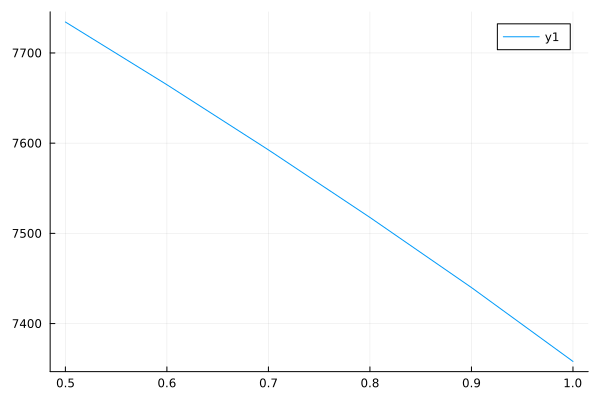

In [305]:
# Plot across intensity
V = 204.7 + 5
B_x = 0e-3
B_y = 10e-3
B_z = Bzs[1]
plot_Ts = [T[2] for T ∈ sorted_Ts if T[1][1] == V && T[1][2] == B_x && T[1][3] == B_y && T[1][4] == B_z]
plot(I_trap_scans[I_trap_idxs], plot_Ts)

In [375]:
using Interpolations

In [376]:
sorted_Ts_dict = sort(Ts)
sorted_Vs = sort(Vs); sorted_Bxs = sort(Bxs); sorted_Bys = sort(Bys); sorted_Bzs = sort(Bzs); sorted_Is_trap = sort(I_trap_scans[I_trap_idxs])
Vs_nodes = zeros(length(Vs))
Bx_nodes = zeros(length(Bxs))
By_nodes = zeros(length(Bys))
Bz_nodes = zeros(length(Bzs))
Is_nodes = zeros(length(I_trap_scans[I_trap_idxs]))
Ts_matrix = zeros(length(Vs_nodes), length(Bx_nodes), length(By_nodes), length(Bz_nodes), length(Is_nodes))
for i ∈ eachindex(Vs_nodes), j ∈ eachindex(Bx_nodes), k ∈ eachindex(By_nodes), l ∈ eachindex(Bz_nodes), m ∈ eachindex(Is_nodes)
    Vs_nodes[i] = sorted_Vs[i]
    Bx_nodes[j] = sorted_Bxs[j]
    By_nodes[k] = sorted_Bys[k]
    Bz_nodes[l] = sorted_Bzs[l]
    Is_nodes[m] = sorted_Is_trap[m]
    Ts_matrix[i,j,k,l,m] = sorted_Ts_dict[
        sorted_Vs[i], 
        sorted_Bxs[j], 
        sorted_Bys[k], 
        sorted_Bzs[l], 
        sorted_Is_trap[m]
    ]
end

In [377]:
h_density = StatsBase.normalize(h, mode=:pdf)
;

In [411]:
Bz_noise = 0.68e-3
normal_d = Normal(0.0, Bz_noise)
itp1 = linear_interpolation((Vs_nodes, Bx_nodes, By_nodes, Bz_nodes, Is_nodes), Ts_matrix);
itp2 = linear_interpolation((I_trap_scans), h_density.weights)
B_weight(x) = pdf(normal_d, x)
;

In [412]:
using Integrals, HCubature

In [413]:
@inline function cos_integrate(x, p)
    I, Bz = x
    V, Bx, By, Bz_mean, t = p
    B_weight(Bz - Bz_mean) * itp2(I) * (cos(2π * t / itp1(V, Bx, By, Bz, I)) + 1) / 2
end

cos_integrate (generic function with 1 method)

In [422]:
V = 206.5
Bx = 10e-3
By = 10e-3
Bz = 210e-3
times = 0:10:2000
vals = zeros(length(Vs), length(Bzs), length(times))
progress = Progress(length(times))

a = (Is_nodes[1], 0.0)
b = (Is_nodes[end], 0.0)
prob = IntegralProblem(cos_integrate, a, b, (V, times[1]))

@time Threads.@threads for j ∈ eachindex(times)
    t = times[j]
    a = (Is_nodes[1], Bz - 2Bz_noise)
    b = (Is_nodes[end], Bz + 2Bz_noise)
    prob_t = remake(prob, lb=a, ub=b, p=(V, Bx, By, Bz, t))
    vals[1,1,j] = solve(prob_t, HCubatureJL(), abstol=1e-3).u
    next!(progress)
end
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.148807 seconds (5.16 M allocations: 116.933 MiB, 71.89% compilation time)


2-element Vector{Float64}:
  82.80333356995834
 380.8259689181165

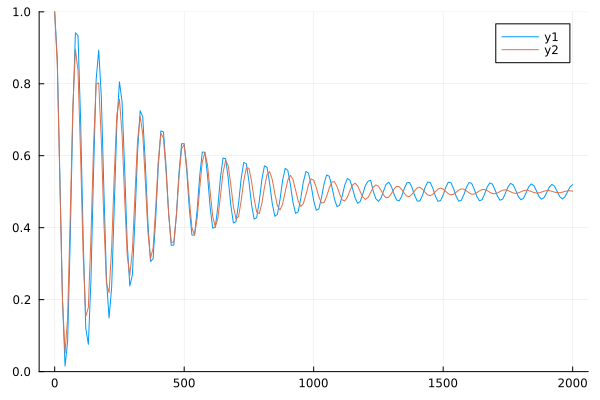

In [423]:
@. decaying_cosine_gaussian(t, p) = (cos(2π * t / p[1]) * exp(-t^2 / 2p[2]^2) + 1) / 2

using FFTW
data = @view vals[1,1,:]
data ./= maximum(data)

# FFT to find the approximate period
freqs = fftshift(fftfreq(length(times), 1 / step(times)))
F = fftshift(fft(data))
lower_idx = (2+ceil(Int64, length(freqs)/2))
freq_max = findmax(abs.(F[lower_idx:end]))
T = abs(1 / freqs[lower_idx:end][freq_max[2]])

# Fit with the FFT period as the guess
p0 = [T, 2000.0]
fitted_data = curve_fit(decaying_cosine, times, data, p0)
display(fitted_data.param)

plot(times, vals[1,1,:], ylim=(0,1))
plot!(times, decaying_cosine(times, fitted_data.param))

In [324]:
Vs = 200.7:25:249.7
Bx = 0e-3
By = 0e-3
Bzs = (4:10:201) .* 1e-3
times = 0:100:20000

τs = zeros(length(Vs), length(Bzs))

vals = zeros(length(Vs), length(Bzs), length(times))
a = (Is_nodes[1], 0.0)
b = (Is_nodes[end], 0.0)
prob = IntegralProblem(cos_integrate, a, b, (V, times[1]))

progress = Progress(length(vals))

for (k, V) ∈ enumerate(Vs), (i, Bz) ∈ enumerate(Bzs)
    Threads.@threads for j ∈ eachindex(times)
        t = times[j]
        a = (Is_nodes[1], Bz - 2Bz_noise)
        b = (Is_nodes[end], Bz + 2Bz_noise)
        prob_t = remake(prob, lb=a, ub=b, p=(V, Bx, By, Bz, t))
        vals[k,i,j] = solve(prob_t, HCubatureJL()).u#, abstol=1e-6).u
        next!(progress)
    end

    data = @view vals[k,i,:]
    data ./= maximum(data)

    # FFT to find the approximate period
    freqs = fftshift(fftfreq(length(times), 1 / step(times)))
    F = fftshift(fft(data))
    lower_idx = (2+ceil(Int64, length(freqs)/2))
    freq_max = findmax(abs.(F[lower_idx:end]))
    T = abs(1 / freqs[lower_idx:end][freq_max[2]])

    # Fit with the FFT period as the guess
    p0 = [T, 500.0]
    fitted_data = curve_fit(decaying_cosine, times, data, p0)

    # Save the fitted decay time
    τs[k,i] = fitted_data.param[2]
end

LoadError: TaskFailedException

[91m    nested task error: [39mBoundsError: attempt to access 2×2×2×4×6 extrapolate(interpolate((::Vector{Float64},::Vector{Float64},::Vector{Float64},::Vector{Float64},::Vector{Float64}), ::Array{Float64, 5}, Gridded(Linear())), Throw()) with element type Float64 at index [200.7, 0.0, 0.0, 0.004, 0.75]
    Stacktrace:
      [1] [0m[1mthrow_boundserror[22m[0m[1m([22m[90mA[39m::[0mInterpolations.Extrapolation[90m{Float64, 5, Interpolations.GriddedInterpolation{Float64, 5, Array{Float64, 5}, Gridded{Linear{Throw{OnGrid}}}, NTuple{5, Vector{Float64}}}, Gridded{Linear{Throw{OnGrid}}}, Throw{Nothing}}[39m, [90mI[39m::[0mNTuple[90m{5, Float64}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase[39m [90m.\[39m[90m[4mabstractarray.jl:703[24m[39m
      [2] [0m[1minbounds_index[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\Interpolations\L7A07\src\extrapolation\[39m[90m[4mextrapolation.jl:111[24m[39m[90m [inlined][39m
      [3] [0m[1minbounds_position[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\Interpolations\L7A07\src\extrapolation\[39m[90m[4mextrapolation.jl:102[24m[39m[90m [inlined][39m
      [4] [0m[1m(::Interpolations.Extrapolation{Float64, 5, Interpolations.GriddedInterpolation{Float64, 5, Array{Float64, 5}, Gridded{Linear{Throw{OnGrid}}}, NTuple{5, Vector{Float64}}}, Gridded{Linear{Throw{OnGrid}}}, Throw{Nothing}})[22m[0m[1m([22m::[0mFloat64, ::[0mFloat64, ::[0mFloat64, ::[0mFloat64, ::[0mFloat64[0m[1m)[22m
    [90m    @ [39m[35mInterpolations[39m [90mC:\Users\Christian Hallas\.julia\packages\Interpolations\L7A07\src\extrapolation\[39m[90m[4mextrapolation.jl:48[24m[39m
      [5] [0m[1mcos_integrate[22m
    [90m    @ [39m[90m.\[39m[90m[4mIn[309]:4[24m[39m[90m [inlined][39m
      [6] [0m[1m(::Integrals.var"#18#20"{IntegralProblem{false, Tuple{Float64, Float64, Float64, Float64, Int64}, typeof(cos_integrate), Tuple{Float64, Float64}, Tuple{Float64, Float64}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}})[22m[0m[1m([22m[90mx[39m::[0mStaticArraysCore.SVector[90m{2, Float64}[39m[0m[1m)[22m
    [90m    @ [39m[36mIntegrals[39m [90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:188[24m[39m
      [7] [0m[1m(::HCubature.GenzMalik{2, Float64})[22m[0m[1m([22m[90mf[39m::[0mIntegrals.var"#18#20"[90m{IntegralProblem{false, Tuple{Float64, Float64, Float64, Float64, Int64}, typeof(cos_integrate), Tuple{Float64, Float64}, Tuple{Float64, Float64}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}}[39m, [90ma[39m::[0mStaticArraysCore.SVector[90m{2, Float64}[39m, [90mb[39m::[0mStaticArraysCore.SVector[90m{2, Float64}[39m, [90mnorm[39m::[0mtypeof(norm)[0m[1m)[22m
    [90m    @ [39m[32mHCubature[39m [90mC:\Users\Christian Hallas\.julia\packages\HCubature\MepxP\src\[39m[90m[4mgenz-malik.jl:121[24m[39m
      [8] [0m[1mhcubature_[22m[0m[1m([22m[90mf[39m::[0mFunction, [90ma[39m::[0mStaticArraysCore.SVector[90m{2, Float64}[39m, [90mb[39m::[0mStaticArraysCore.SVector[90m{2, Float64}[39m, [90mnorm[39m::[0mtypeof(norm), [90mrtol_[39m::[0mFloat64, [90matol[39m::[0mFloat64, [90mmaxevals[39m::[0mInt64, [90minitdiv[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[32mHCubature[39m [90mC:\Users\Christian Hallas\.julia\packages\HCubature\MepxP\src\[39m[90m[4mHCubature.jl:60[24m[39m
      [9] [0m[1mhcubature_[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\HCubature\MepxP\src\[39m[90m[4mHCubature.jl:131[24m[39m[90m [inlined][39m
     [10] [0m[1m#hcubature#3[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\HCubature\MepxP\src\[39m[90m[4mHCubature.jl:178[24m[39m[90m [inlined][39m
     [11] [0m[1m__solvebp_call[22m[0m[1m([22m::[0mIntegralProblem[90m{false, Tuple{Float64, Float64, Float64, Float64, Int64}, typeof(cos_integrate), Tuple{Float64, Float64}, Tuple{Float64, Float64}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}[39m, ::[0mHCubatureJL, ::[0mIntegrals.ReCallVJP[90m{Integrals.ZygoteVJP}[39m, ::[0mTuple[90m{Float64, Float64}[39m, ::[0mTuple[90m{Float64, Float64}[39m, ::[0mTuple[90m{Float64, Float64, Float64, Float64, Int64}[39m; [90mreltol[39m::[0mFloat64, [90mabstol[39m::[0mFloat64, [90mmaxiters[39m::[0mInt64, [90mkwargs[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
    [90m    @ [39m[36mIntegrals[39m [90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:197[24m[39m
     [12] [0m[1m__solvebp_call[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:178[24m[39m[90m [inlined][39m
     [13] [0m[1m#__solvebp#12[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:159[24m[39m[90m [inlined][39m
     [14] [0m[1m__solvebp[22m
    [90m    @ [39m[90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:159[24m[39m[90m [inlined][39m
     [15] [0m[1msolve[22m[0m[1m([22m::[0mIntegralProblem[90m{false, Tuple{Float64, Float64, Float64, Float64, Int64}, typeof(cos_integrate), Tuple{Float64, Float64}, Tuple{Float64, Float64}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}[39m, ::[0mHCubatureJL; [90msensealg[39m::[0mIntegrals.ReCallVJP[90m{Integrals.ZygoteVJP}[39m, [90mdo_inf_transformation[39m::[0mNothing, [90mkwargs[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
    [90m    @ [39m[36mIntegrals[39m [90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:155[24m[39m
     [16] [0m[1msolve[22m[0m[1m([22m::[0mIntegralProblem[90m{false, Tuple{Float64, Float64, Float64, Float64, Int64}, typeof(cos_integrate), Tuple{Float64, Float64}, Tuple{Float64, Float64}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}[39m, ::[0mHCubatureJL[0m[1m)[22m
    [90m    @ [39m[36mIntegrals[39m [90mC:\Users\Christian Hallas\.julia\packages\Integrals\9bCIo\src\[39m[90m[4mIntegrals.jl:150[24m[39m
     [17] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m.\[39m[90m[4mIn[324]:22[24m[39m[90m [inlined][39m
     [18] [0m[1m(::var"#2669#threadsfor_fun#344"{var"#2669#threadsfor_fun#343#345"{Int64, Float64, Int64, Float64, Base.OneTo{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[33mMain[39m [90m.\[39m[90m[4mthreadingconstructs.jl:84[24m[39m
     [19] [0m[1m#2669#threadsfor_fun[22m
    [90m    @ [39m[90m.\[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [20] [0m[1m(::Base.Threads.var"#1#2"{var"#2669#threadsfor_fun#344"{var"#2669#threadsfor_fun#343#345"{Int64, Float64, Int64, Float64, Base.OneTo{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[90mBase.Threads[39m [90m.\[39m[90m[4mthreadingconstructs.jl:30[24m[39m

Progress:   0%|█                                        |  ETA: 4:12:53

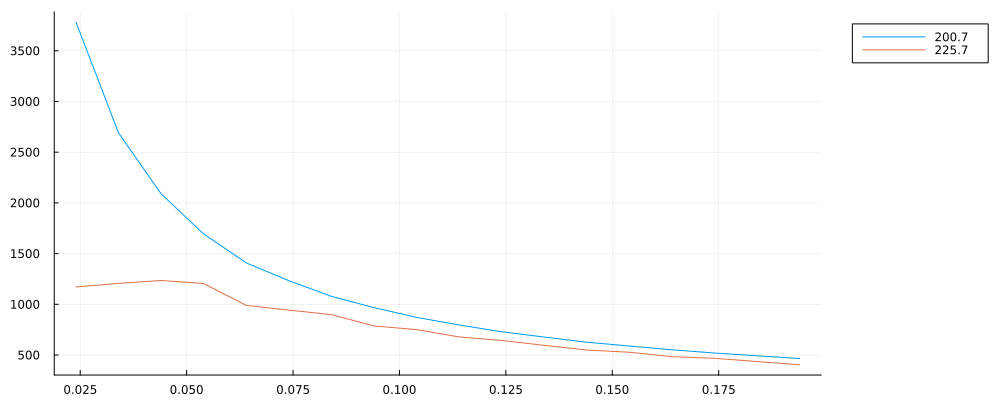

In [218]:
i = 3
plot(Bzs[i:end], τs[:,i:end]', label=Vs', size=(1000,400), legend=:outertopright)